# Unsupervised Learning  - Wataru 

We will try to analyze data of black friday transactions of a retail store. 

Key questions we will be answering are:

(1) How are transactions distributed over different age groups, occupations and cities.
<br>
(2) Which groups of people have a higher transaction frequencies and which have higher purchase amount?
<br>
(3) How does marital status and years of living in the city affect number and amount of purchases?
<br>
(4) "Predicting the age group of the consumer" or "Predicting which groups will spend the most or least"
<br>

In the end, we will create a model to predict purchase amount based on other features.
This model can be used for better marketing and business anlalytics.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.DataFrame = pd.read_csv('BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

Purchase amount may not be in U.S. Dollars

# What to cluster?


Let's start with clustering customers by purchase amount and Occupation
- From this we will move on to more meaningful clusterings
- The Problem with this is that Occupation is a discrete data point

In [69]:
train = data[['User_ID','Occupation', 'Purchase']].groupby(['User_ID']).mean()
train.head()

,Occupation,Purchase
User_ID,,
1000001,10.0,9808.264706
1000002,16.0,10662.539474
1000003,15.0,11780.517241
1000004,7.0,15845.153846
1000005,20.0,7745.292453


# KMeans Clustering

Now let's do some KMeans clustering

Determine the optimal number of clusters.
To give equal importance to all features, we need to scale the continuous features. We will be using scikit-learn’s MinMaxScaler as the feature matrix is a mix of binary and continuous features . Other alternatives includes StandardScaler.
For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster center.

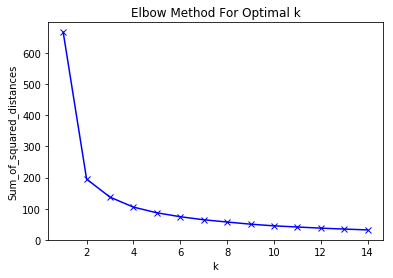

In [67]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(train)
data_transformed = mms.transform(train)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


Text(0, 0.5, 'Purchase')

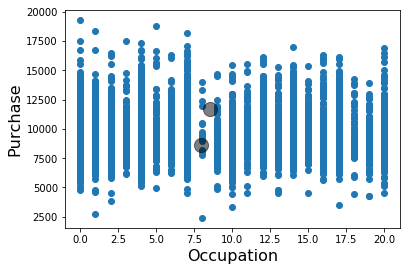

In [79]:
from sklearn.cluster import KMeans

#Convert to array 
train = train.reset_index(drop=True).values

kmeans = KMeans(n_clusters=2, random_state=0).fit(train)
kmeans.predict([[0, 0], [12, 3]])
centers = kmeans.cluster_centers_

plt.scatter(train[:,0],train[:,1])
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('Occupation', fontsize=16)
plt.ylabel('Purchase', fontsize=16)



Let's see the silhouette scores

(Wikipedia) The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

0.71-1.0
A strong structure has been found

0.51-0.70
A reasonable structure has been found

0.26-0.50
The structure is weak and could be artificial. Try additional methods of data analysis.

< 0.25
No substantial structure has been found

In [116]:
from sklearn.metrics import silhouette_samples, silhouette_score

cluster_range = range( 2, 7 )

for n_clusters in cluster_range:
  
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(train)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(train, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.5544475488782326
For n_clusters = 3 The average silhouette_score is : 0.5271940817210486
For n_clusters = 4 The average silhouette_score is : 0.5277035742890218
For n_clusters = 5 The average silhouette_score is : 0.5224829034748454
For n_clusters = 6 The average silhouette_score is : 0.5145053675397436


# Additional KMeans Clustering

<b>What two numerical data can I get? 
<br>
(1) Average Purchase
<br>
(2) Freq_Purchased

In [6]:
train = data[['User_ID', 'Purchase']]
train['Freq_Purchased'] = train.groupby('User_ID')['User_ID'].transform('count')
train = train.groupby(['User_ID']).mean()

#sort based on purchase amount 
train = train.sort_values(by=['Purchase'])
print(train.head())

#Convert to array 
train_arr = train.reset_index(drop=True).values

#get top 5%
top = train_arr[5800:,:]
top.shape

            Purchase  Freq_Purchased
User_ID                             
1004486  2397.862069            29.0
1003598  2749.512195            41.0
1005944  3290.714286            14.0
1002744  3458.846154            91.0
1004636  3852.866667            15.0


C:\Users\Wataru\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(91, 2)

# Elbow Method

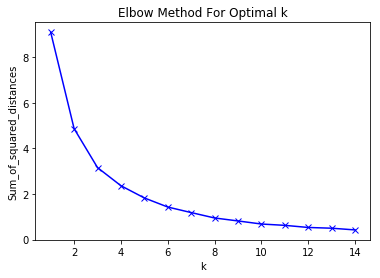

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(top)
data_transformed = mms.transform(top)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Silhouette Score

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score

cluster_range = range( 2, 7 )

for n_clusters in cluster_range:
  
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(top)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(top, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.6184448925686422
For n_clusters = 3 The average silhouette_score is : 0.6050654623277996
For n_clusters = 4 The average silhouette_score is : 0.5621658318018565
For n_clusters = 5 The average silhouette_score is : 0.6099469985722991
For n_clusters = 6 The average silhouette_score is : 0.609349957657374


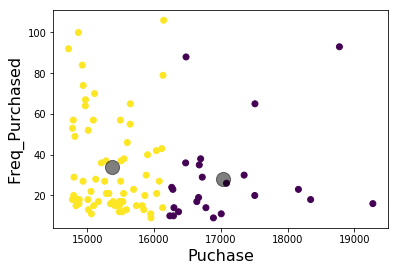

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(top)
kmeans.predict([[2000,30],[1000,40],[1500,50],[1700,60]])
centers = kmeans.cluster_centers_

labels = kmeans.labels_
plt.scatter(top[:, 0], top[:, 1], c=labels)
plt.xlabel('Puchase', fontsize=16)
plt.ylabel('Freq_Purchased', fontsize=16)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [11]:
centers

array([[17032.48086947,    28.33333333],
       [15367.09891368,    33.85074627]])

<b> In conclusion, KMeans is not very helpful in this dataset

# DBSCAN

DBSCAN(algorithm='auto', eps=100, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=1, p=None)

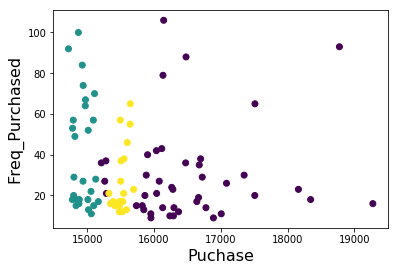

In [25]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=100, min_samples=10).fit(top)
labels = clustering.labels_
plt.scatter(top[:, 0], top[:, 1], c=labels)
plt.xlabel('Puchase', fontsize=16)
plt.ylabel('Freq_Purchased', fontsize=16)
clustering
#plt.scatter(clustering[:, 0], clustering[:, 1], c='black', s=200, alpha=0.5);

Because of its sensitivity to parameters, DBSCAN might not yield the best results for this dataset

# GMM Clustering

We will do GMM clusterin with 4 components

Text(0, 0.5, 'Purchase')

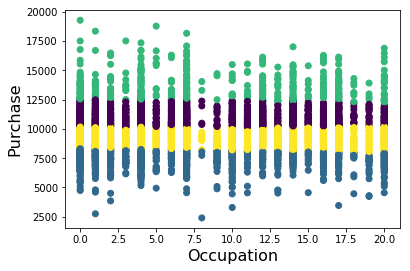

In [80]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(train)
labels = gmm.predict(train)
plt.scatter(train[:, 0], train[:, 1], c=labels);
plt.xlabel('Occupation', fontsize=16)
plt.ylabel('Purchase', fontsize=16)

Let's see the Silhouette score for Gasuaain Mixture model

In [131]:
from sklearn.metrics import silhouette_samples, silhouette_score

cluster_range = range( 2, 7 )

for n_components in cluster_range:
    clusterer = GaussianMixture(n_components=n_components, random_state=10)
    clusterer = GaussianMixture(n_components=n_components).fit(train)
    cluster_labels = clusterer.predict(train)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
    silhouette_avg = silhouette_score(train, cluster_labels)
    print("For n_components =", n_components,
          "The average silhouette_score is :", silhouette_avg)

For n_components = 2 The average silhouette_score is : 0.5582700713839438
For n_components = 3 The average silhouette_score is : 0.5151347303044269
For n_components = 4 The average silhouette_score is : 0.5186541053615713
For n_components = 5 The average silhouette_score is : 0.5159588566937843
For n_components = 6 The average silhouette_score is : 0.5107000651476824


# Additional GMM Clustering

<b>What two numerical data can I get? 
<br>
(1) Average Purchase
<br>
(2) Freq_Purchased

In [5]:
train = data[['User_ID', 'Purchase']]
train['Freq_Purchased'] = train.groupby('User_ID')['User_ID'].transform('count')
train = train.groupby(['User_ID']).mean()

#sort based on purchase amount 
train = train.sort_values(by=['Purchase'])
print(train.head())

#Convert to array 
train = train.reset_index(drop=True).values

#get top 5%
top = train[5800:,:]
top.shape

            Purchase  Freq_Purchased
User_ID                             
1004486  2397.862069            29.0
1003598  2749.512195            41.0
1005944  3290.714286            14.0
1002744  3458.846154            91.0
1004636  3852.866667            15.0


C:\Users\Wataru\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(91, 2)

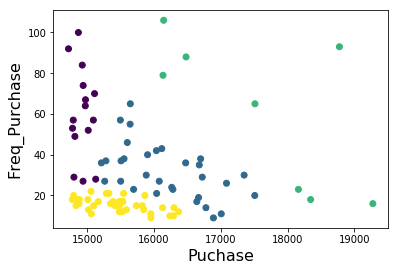

In [9]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(top)
labels = gmm.predict(top)
plt.xlabel('Puchase', fontsize=16)
plt.ylabel('Freq_Purchase', fontsize=16)
plt.scatter(top[:, 0], top[:, 1], c=labels);

<b> In conclusion, GMM is not very helpful in this dataset

A lot of our data values are categorical. Maybe we need clustering for categorical values.
Maybe something like kModes

# K-Prototype

<b>
<br>
The k-prototypes algorithm combines k-modes and k-means and is able to cluster mixed numerical / categorical data.

In [3]:
import numpy as np
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style

What data to use? 
<br>
key: User_ID 
<br>
Attributes: Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years,  Martial Status 
<br>
Attributes: Purchase


In [15]:
data.dtypes 

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

Let's get data that has unique id and has purchase amount of each user summed up.

In [51]:
train = data[['User_ID','Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 
              'Marital_Status','Purchase']]
train = train.groupby(['User_ID','Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 
              'Marital_Status'])[['Purchase']].sum()
train = train.reset_index().values
train.shape


(5891, 8)

In [50]:
X = train[:, 1:]
X[:, 6] = X[:, 6].astype(float)

kproto = KPrototypes(n_clusters=7, init='Cao')
clusters = kproto.fit_predict(X, categorical=[0,1,2,3,4,5])
center = kproto.cluster_centroids_
print()
for i in range(7):
    print(center[1][i], ' pays ', center[0][i])



['M' '26-35' '4' 'C' '1' '0']  pays  [1095612.44266055]
['M' '26-35' '0' 'B' '1' '0']  pays  [3868365.72121212]
['M' '26-35' '7' 'A' '1' '0']  pays  [6007828.6969697]
['M' '26-35' '4' 'B' '1' '0']  pays  [1750634.7807971]
['M' '26-35' '7' 'C' '1' '0']  pays  [224719.57890594]
['M' '26-35' '4' 'C' '1' '0']  pays  [609715.44854507]
['M' '26-35' '4' 'B' '1' '0']  pays  [2599698.18495298]


# K-Prototype on top 5% of purchase

In [8]:
#sort based on purchase amount and  get top 5% 
top = train[train[:,7].argsort()][5597:,:]
syms = top[:, 0]
X = top[:, 1:]
X[:, 6] = X[:, 6].astype(float)

kproto = KPrototypes(n_clusters=7, init='Cao')
clusters = kproto.fit_predict(X, categorical=[0,1,2,3,4,5])


Gender Age Occupation City_Category Stay_In_Current_City_Years Marital_Status Purchase

['M' '26-35' '4' 'B' '1' '1']  pays  [3394704.57142857]
['M' '26-35' '4' 'B' '1' '0']  pays  [2940491.37647059]
['M' '26-35' '0' 'A' '1' '0']  pays  [4491918.12820513]
['M' '26-35' '0' 'B' '1' '0']  pays  [3947733.53333333]
['M' '26-35' '17' 'A' '1' '0']  pays  [6425052.61538462]
['M' '26-35' '7' 'A' '1' '0']  pays  [5305369.33333333]
['M' '26-35' '16' 'A' '0' '0']  pays  [9618007.5]


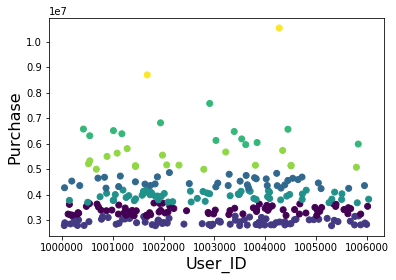

In [9]:
plt.scatter(top[:, 0], top[:, 7], c=clusters)
plt.xlabel('User_ID', fontsize=16)
plt.ylabel('Purchase', fontsize=16)
center = kproto.cluster_centroids_ 
print('Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 
              'Marital_Status','Purchase')
print()
for i in range(7):
    print(center[1][i], ' pays ', center[0][i])


<b>In conclusion Male, age 26-35, that has stayed in the city 0-1 year and single spend the most on this Blak Friday analysis. Targeting marketing for that group might be effective.

# K-Prototype on bottom 5% of purchase

In [12]:
train = data[['User_ID','Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 
              'Marital_Status','Purchase']]
train = train.groupby(['User_ID','Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 
              'Marital_Status'])[['Purchase']].sum()
train = train.reset_index().values
train.shape


(5891, 8)

In [13]:
#sort based on purchase amount and  get bottom 5% 
bottom = train[train[:,7].argsort()][0:295]

syms = bottom[:, 0]
X = bottom[:, 1:]
X[:, 6] = X[:, 6].astype(float)

kproto = KPrototypes(n_clusters=7, init='Cao')
clusters = kproto.fit_predict(X, categorical=[0,1,2,3,4,5])

Gender Age Occupation City_Category Stay_In_Current_City_Years Marital_Status Purchase

['F' '36-45' '1' 'C' '1' '0']  pays  [91091.38]
['M' '26-35' '7' 'C' '2' '0']  pays  [54707.47826087]
['M' '26-35' '4' 'C' '1' '0']  pays  [98869.63265306]
['M' '26-35' '1' 'C' '1' '0']  pays  [82985.05128205]
['M' '26-35' '7' 'C' '2' '0']  pays  [106507.34693878]
['F' '26-35' '6' 'C' '1' '0']  pays  [71285.12121212]
['M' '26-35' '0' 'C' '1' '0']  pays  [112955.01923077]


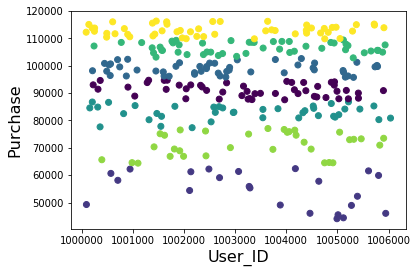

In [16]:
plt.scatter(bottom[:, 0], bottom[:, 7], c=clusters)
plt.xlabel('User_ID', fontsize=16)
plt.ylabel('Purchase', fontsize=16)
center = kproto.cluster_centroids_ 
print('Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 
              'Marital_Status','Purchase')
print()
for i in range(7):
    print(center[1][i], ' pays ', center[0][i])
    #print(center[0][i])

It seems there are still many Males 26-35 that purchase products. However, all of them are from city 'C' in cotrast to top 5% purchasers that were from city 'A' and 'B' . 

# K-Modes
<b>
<br>
k-modes is used for clustering categorical variables. It defines clusters based on the number of matching categories between data points.

Get data with categorical values

In [7]:
train = data[['User_ID','Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 
              'Marital_Status']]
#Convert to array 
train = train.reset_index(drop=True).values

#get random samples
#8000 samples
rand = train[np.random.choice(train.shape[0], 8000, replace=False), :]
rand.shape

(8000, 7)

In [8]:
import numpy as np
from kmodes.kmodes import KModes

km = KModes(n_clusters=7, init='Huang', n_init=5)

clusters = km.fit_predict(rand)
clusters

array([4, 2, 5, ..., 3, 2, 5], dtype=uint16)

# Resulting clusters from Kmodes

In [9]:
import pandas as pd
#Tells me the mode of each cluster
center = km.cluster_centroids_
print('Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 
              'Marital_Status','Purchase')
center

Gender Age Occupation City_Category Stay_In_Current_City_Years Marital_Status Purchase


array([['1001088', 'F', '18-25', '4', 'B', '1', '0'],
       ['1004277', 'M', '36-45', '17', 'C', '1', '0'],
       ['1000549', 'M', '18-25', '4', 'A', '4+', '0'],
       ['1001181', 'M', '26-35', '7', 'A', '1', '1'],
       ['1004508', 'M', '26-35', '0', 'B', '2', '0'],
       ['1005643', 'F', '36-45', '7', 'B', '4+', '1'],
       ['1003792', 'M', '26-35', '1', 'A', '1', '0']], dtype='<U11')

<b> In conclusion these are the clustered groups, so customer segmentation can be done with these results.

# Further Discussions
    - add Silouhette scores and elbow method to KMode and KProto, or any type of validation for these algorithms.
    - some type of valuation method for Kmode and Kproto
  
